## Import packages and load MNIST dataset

In [1]:
### from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

#import mnist data set
from keras.datasets import mnist

# the data, shuffled and split between tran and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)

IMAGE_H = X_train.shape[1]
IMAGE_W = X_train.shape[2]

Using TensorFlow backend.


X_train shape (60000, 28, 28)
y_train shape (60000,)


## Show samples of the data

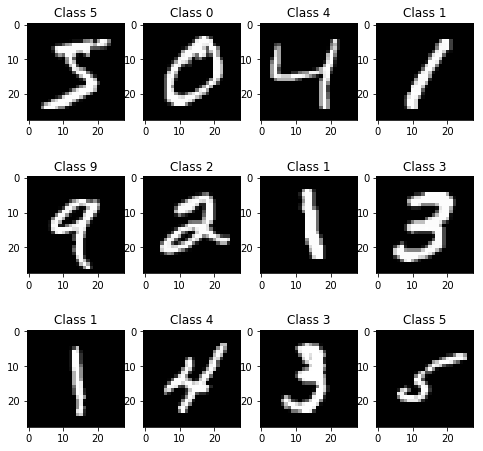

In [2]:
plt.figure(figsize=(8, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Class {}".format(Y_train[i]))

## Create keras model to train MNIST data

In [3]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Reshape, AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, concatenate
from keras.layers import Softmax

#d_format = 'channels_first'
d_format='channels_last'

if d_format == 'channels_last':
    input_image = Input(shape=(IMAGE_H, IMAGE_W, 1), name='data')
else:
    input_image = Input(shape=(1, IMAGE_H, IMAGE_W), name='data')

conv1 = Conv2D(32, (5, 5), strides=(1,1), name='conv1', data_format=d_format)(input_image)
pool1 = MaxPooling2D(pool_size=(2, 2), name='pool1', data_format=d_format)(conv1)
conv2 = Conv2D(64, (3,3), strides=(1,1), name='conv2', data_format=d_format)(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2), name='pool2', data_format=d_format)(conv2)

x = Flatten(name='flatten')(pool2)
x = Dropout(0.5, name='dropout')(x);

fc1 = Dense(256, name = 'dense1', activation='relu')(x)
out = Dense(10, name='output', activation='softmax')(fc1)

model = Model(input_image, out)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 32)        832       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 10, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
__________

## Preprocess the data

In [4]:
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

n_classes = 10

y_train = np_utils.to_categorical(Y_train, n_classes)
y_test = np_utils.to_categorical(Y_test, n_classes)

print("Training input shape", x_train.shape)
print('training output shape ', y_train.shape)
print("Testing input shape", x_test.shape)
print('testing output shape ', y_test.shape)

Training input shape (60000, 28, 28, 1)
training output shape  (60000, 10)
Testing input shape (10000, 28, 28, 1)
testing output shape  (10000, 10)


## Compile the model

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model
Note: Depending on your computer's resources, the training step may take a while. My computer has NVIDIA Quadro M1000M and the training takes a little over one minute.

In [6]:
model.fit(x_train, y_train,
          batch_size=128, epochs=8,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 11s 188us/step - loss: 0.2095 - acc: 0.9366 - val_loss: 0.0531 - val_acc: 0.9838
Epoch 2/8
60000/60000 [==============================] - 9s 150us/step - loss: 0.0673 - acc: 0.9793 - val_loss: 0.0328 - val_acc: 0.9880
Epoch 3/8
60000/60000 [==============================] - 9s 151us/step - loss: 0.0483 - acc: 0.9845 - val_loss: 0.0313 - val_acc: 0.9903
Epoch 4/8
60000/60000 [==============================] - 9s 151us/step - loss: 0.0409 - acc: 0.9869 - val_loss: 0.0257 - val_acc: 0.9924
Epoch 5/8
60000/60000 [==============================] - 9s 150us/step - loss: 0.0344 - acc: 0.9890 - val_loss: 0.0307 - val_acc: 0.9905
Epoch 6/8
60000/60000 [==============================] - 9s 148us/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.0284 - val_acc: 0.9916
Epoch 7/8
60000/60000 [==============================] - 9s 149us/step - loss: 0.0268 - acc: 0.9918 - val_loss: 0.0285 - val_ac

## Predict outpus for all test samples

In [7]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
pred_test = model.predict(x_test)

## Show output predictions for some randomly selected test inputs

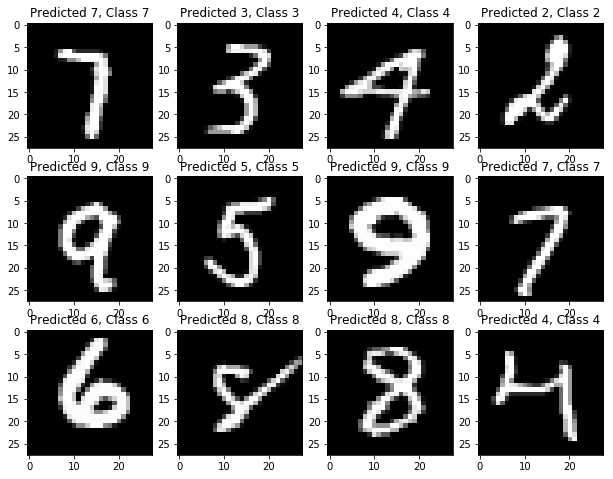

In [8]:
rind = np.arange(0, x_test.shape[0])
np.random.shuffle(rind)

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=1,  right=2)

for i in range(0, 12):
    ind  = rind[i]
    plt.subplot(3,4,i+1)
    
    plt.imshow(X_test[ind].reshape(28,28), cmap='gray', interpolation='none')
    pred_class = np.argmax(pred_test[ind])
    plt.title("Predicted {}, Class {}".format(pred_class, Y_test[ind]))
    

In [9]:
outFileName = './mnist_keras_model.h5'
model.save(outFileName)

## Convert keras model to caffe2 model and save it to file

In [10]:
from keras2caffe2 import keras2caffe2

init_net = './caffe2_init_net.pb'
predict_net = './caffe2_predict_net.pb'

train_net, test_net =  keras2caffe2(model, IMAGE_W, IMAGE_H,
                                    init_net, predict_net, 
                                    use_cudnn=True, 
                                    keras_channel_last= d_format == 'channels_last'
                                   )

## Clear keras memory so that caffe2 can use all available GPU memory

In [11]:
from keras import backend as K 

sess = K.get_session()
K.clear_session()
sess.close()

#use numba library to release cuda memory
from numba import cuda
cuda.select_device(0)
cuda.close()

## Loade saved caffe2 model from file

In [12]:
from caffe2.python import workspace, core, model_helper, brew, optimizer, utils
from caffe2.proto import caffe2_pb2

def load_net(INIT_NET, PREDICT_NET, device_opts):

    init_def = caffe2_pb2.NetDef()
    with open(INIT_NET, 'rb') as f:
        init_def.ParseFromString(f.read())
        init_def.device_option.CopyFrom(device_opts)
        workspace.RunNetOnce(init_def.SerializeToString())
    
    net_def = caffe2_pb2.NetDef()
    with open(PREDICT_NET, 'rb') as f:
        net_def.ParseFromString(f.read())
        net_def.device_option.CopyFrom(device_opts)
        workspace.CreateNet(net_def.SerializeToString(), overwrite=True)
        
    return (init_def, net_def)
    

init_net = './caffe2_init_net.pb'
predict_net = './caffe2_predict_net.pb'

device_opts = core.DeviceOption(caffe2_pb2.CUDA, 0) 

init_def, net_def = load_net(init_net, predict_net, device_opts)

## Display caffe2 model 

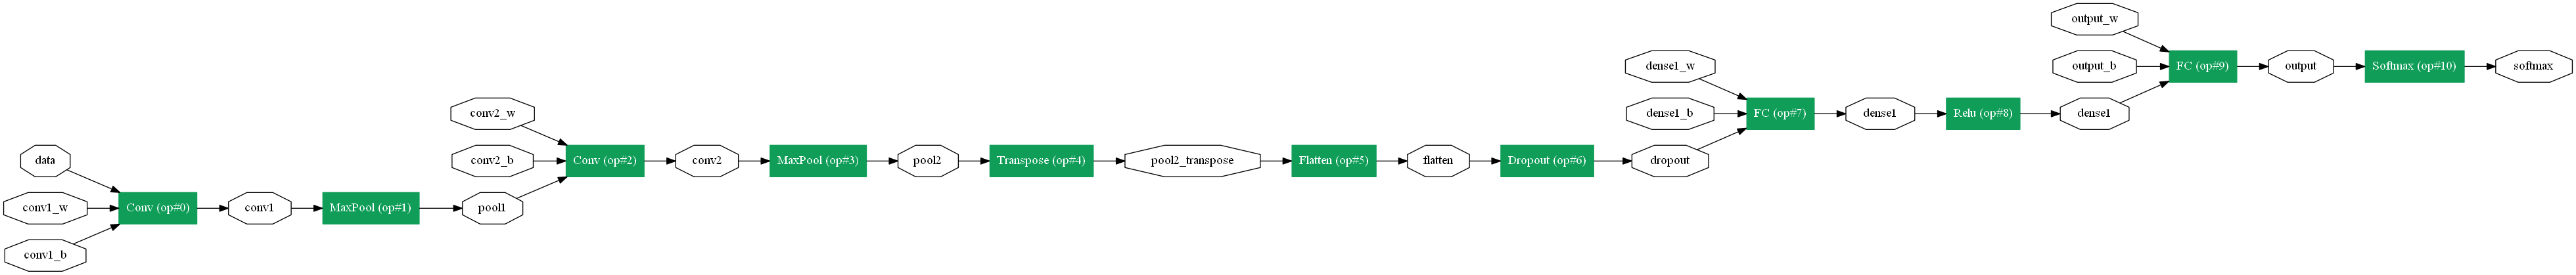

In [13]:
from caffe2.python import net_drawer
from IPython import display
from caffe2.python import workspace, core, model_helper, brew, optimizer, utils
from caffe2.proto import caffe2_pb2

graph = net_drawer.GetPydotGraph(net_def, rankdir="LR")
display.Image(graph.create_png(), width=1800, height=1200)

## Predict the randomly selected test samples using caffe2

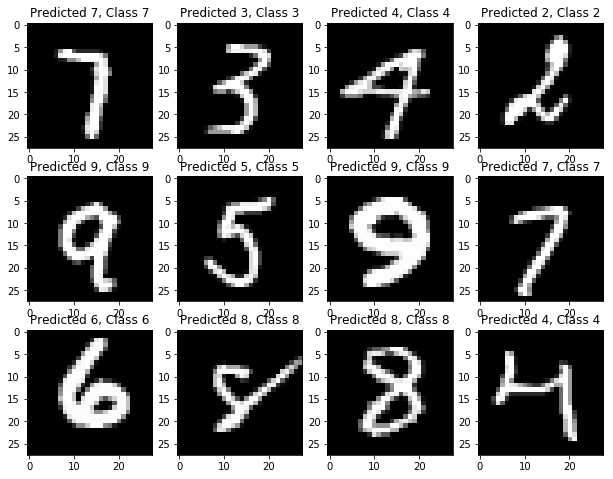

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=1,  right=2)

device_opts = core.DeviceOption(caffe2_pb2.CUDA, 0) 

for i in range(0, 12):
    ind  = rind[i]
    plt.subplot(3,4,i+1)
    
    test_img = X_test[ind].reshape(IMAGE_H, IMAGE_W)
    plt.imshow(test_img, cmap='gray')
    
    test_img_cfirst = x_test[ind].reshape(1, 1, IMAGE_H, IMAGE_W)
    workspace.FeedBlob("data", test_img_cfirst, device_option=device_opts)
    workspace.RunNet(net_def.name, 1)
    
    caffe2_pred_test = workspace.FetchBlob("softmax"),   
    pred_class = np.argmax(caffe2_pred_test)
    
    plt.title("Predicted {}, Class {}".format(pred_class, Y_test[ind]))


#### Caffe2's outputs should match outputs from keras model